# Duomenų surinkimas iš portalų naudojant 'web-scraping'

##  Duomenų surinkimas iš 'AUTOGIDAS.lt'

In [193]:
# Šis kodas surenka kiekvieno automobilio nuorodą iš nurodyto puslapių skaičiaus ir patalpina juos į sąrašą ad_links
from bs4 import BeautifulSoup
import requests
import csv
import time

# Naudojami headers, kurie imituja naršyklę 
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/93.0.4577.63 Safari/537.36"
}
url = 'https://autogidas.lt/skelbimai/automobiliai/'
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, 'html.parser')
base_url = 'https://autogidas.lt'
# nuorodos pabaigoje page={} irašius skaičių pvz page=2 nukeliaujama į antrą paslapį.
url_template = '/skelbimai/automobiliai/?f_434[0]=Naudotas&f_1[0]=&f_model_14[0]=&f_50=kaina_asc&page={}'

# total_pages reikia nustatyti 1 psl daugiau nei norima scrapinti
total_pages = 2
# Sukuriamas tuščias sąrašas
ad_links = []

# Ciklas eiti per puslapius.
for page_number in range(1, total_pages):
    print(f"Scraping links {page_number}/{total_pages-1}")  
    main_url = base_url + url_template.format(page_number)
    source = requests.get(main_url, headers=headers).text
    main_soup = BeautifulSoup(source, 'html.parser')
    time.sleep(0.2)  # add 0.2 seconds time delay
    
    # Ciklas surinkti konkretaus skelbimo nuorodas, įdėti į sąrašą ad_links
    for article in main_soup.find_all('article', class_='list-item'):
        ad_link = article.find('a', class_='item-link')['href']
        ad_links.append('https://autogidas.lt' + ad_link)
        time.sleep(0.1)  # add 0.2 seconds time delay


Scraping links 1/1


In [194]:
# Šis kodas kodas surenka informaciją iš kiekvienos nuorodos ir patalpina informaciją į csv failą. 
column_names = ['Kaina', 'Markė', 'Modelis', 'Metai', 'Variklis', 'Kuro tipas', 'Kėbulo tipas', 'Pavarų dėžė', 'Defektai', 'Vairo padėtis', 'Durų skaičius', 'TA iki', 'Rida', 'Svoris, kg', 'Ratlankiai', 'CO2 emisija, g/km', 'Euro standartas', 'Mieste', 'Užmiestyje']

page_number = 1

#Sukuriamas csv failas su galimybe rašyti, įrašomi stulpelių pavadinimai
with open("autogidas_car_info_test", "w", encoding="UTF-8", newline='') as failas:
    csv_writer = csv.DictWriter(failas, fieldnames=column_names)
    csv_writer.writeheader()
    
    for ad_link in ad_links:
        print(f"Scraping page {page_number}/{len(ad_links)}")
        source = requests.get(ad_link, headers=headers).text
        soup = BeautifulSoup(source, 'html.parser')
        time.sleep(0.2)

        try:
            car_info = {}
            # Atskirai paimama kainos informacija
            Kaina = soup.find('div', class_='price').text.strip().replace(",", "").replace(" €", "").replace(" ", "")
            car_info['Kaina'] = Kaina

            labels = soup.find_all('div', class_='left')
            params = soup.find_all('div', class_='right')
            
            # Ciklas surinkti informacijai iš params bloko ir įrašyti informaciją į csv
            for label, param in zip(labels, params):
                label_text = label.text.strip()
                time.sleep(0.1)
                # Surenkama tik ta informacija kuri atitinka stulpelių pavadinimus
                if label_text in column_names:
                    car_info[label_text] = param.text.strip()
            csv_writer.writerow(car_info)
        except:
            pass
        page_number += 1

Scraping page 1/30
Scraping page 2/30
Scraping page 3/30
Scraping page 4/30
Scraping page 5/30
Scraping page 6/30
Scraping page 7/30
Scraping page 8/30
Scraping page 9/30
Scraping page 10/30
Scraping page 11/30
Scraping page 12/30
Scraping page 13/30
Scraping page 14/30
Scraping page 15/30
Scraping page 16/30
Scraping page 17/30
Scraping page 18/30
Scraping page 19/30
Scraping page 20/30
Scraping page 21/30
Scraping page 22/30
Scraping page 23/30
Scraping page 24/30
Scraping page 25/30
Scraping page 26/30
Scraping page 27/30
Scraping page 28/30
Scraping page 29/30
Scraping page 30/30


## Duomenų surinkimas iš 'AUTOBILIS.lt'

In [195]:
# Šis kodas surenka kiekvieno automobilio nuorodą iš nurodyto puslapių skaičiaus ir patalpina juos į sąrašą ad_links.
# Naudojami headers, kurie imituja naršyklę.
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/93.0.4577.63 Safari/537.36"
}
base_url = 'https://www.autobilis.lt'
# nuorodos pabaigoje page={} irašius skaičių pvz page=2 nukeliaujama į antrą paslapį.
url_template = '/skelbimai/naudoti-automobiliai?category_id=1&amp%3Bpage=2&page={}'

#total_pages reikia nustatyti 1 psl daugiau nei norima scrapinti
total_pages = 2

ad_links = []

# Ciklas eiti per puslapius.
for page_number in range(1, total_pages):
    print(f"Scraping links {page_number}/{total_pages-1}")  
    main_url = base_url + url_template.format(page_number)
    source = requests.get(main_url, headers=headers).text
    main_soup = BeautifulSoup(source, 'html.parser')
    time.sleep(0.1)  
    
    # Ciklas surinkti konkretaus skelbimo nuorodas, įdėti į sąrašą ad_links
    for article in main_soup.find_all('div', class_='search-rezult-content'):
        ad_link_element = article.find('a')
        if ad_link_element:
            ad_link = ad_link_element['href']
            ad_links.append(ad_link)
         #   time.sleep(0.2)  


Scraping links 1/1


In [196]:
# Šis kodas kodas surenka informaciją iš kiekvienos nuorodos ir patalpina informaciją į csv failą. 
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/93.0.4577.63 Safari/537.36"
}

column_names = ['Kaina', 'Markė', 'Modelis', 'Pagaminimo data', 'Rida','Darbinis tūris, l.','Galia, kW','Kuro tipas','Pavarų dėžė','Kėbulo tipas','Durų skaičius','CO₂ emisija, g/km','Būklė','Vairo padėtis']

page_number = 1

with open("autobilis_car_info_test.csv", "w", encoding="UTF-8", newline='') as failas:
    csv_writer = csv.DictWriter(failas, fieldnames=column_names)
    csv_writer.writeheader()

    for ad_link in ad_links:
        print(f"Scraping page {page_number}/{len(ad_links)}")
        source = requests.get(ad_link, headers=headers).text
        soup = BeautifulSoup(source, 'html.parser')
        time.sleep(0.2)

        try:
            car_info = {}
            # Atskirai paimama kainos informacija
            Kaina = soup.find('span', class_='price-value').text.strip()#.replace(",", "").replace(" €", "").replace(" ", "")
            car_info['Kaina'] = Kaina

            car_info_rows = soup.find_all('div', class_='row car-info-r')
            for row in car_info_rows:
                labels = row.find('div', class_='col-sm-6 car-info-h')
                params = row.find('div', class_='col-sm-6 car-info-c')
                #time.sleep(0.2)
             
            # Ciklas surinkti informacijai iš params bloko
                for label, param in zip(labels, params):
                    label_text = label.text.strip()
                    time.sleep(0.1)
                    # surenkama tik ta informacija kuri atitinka stulpelių pavadinimus
                    if label_text in column_names:
                        car_info[label_text] = param.text.strip()
            csv_writer.writerow(car_info)
        except:
            pass
        page_number += 1               
        

Scraping page 1/20
Scraping page 2/20
Scraping page 3/20
Scraping page 4/20
Scraping page 5/20
Scraping page 6/20
Scraping page 7/20
Scraping page 8/20
Scraping page 9/20
Scraping page 10/20
Scraping page 11/20
Scraping page 12/20
Scraping page 13/20
Scraping page 14/20
Scraping page 15/20
Scraping page 16/20
Scraping page 17/20
Scraping page 18/20
Scraping page 19/20
Scraping page 20/20


## Duomenų surinkimas iš 'AUTOPLIUS.lt'

In [103]:
from selenium import webdriver
from selenium.common.exceptions import NoSuchElementException

#Į system 32 reikia parsisiųsti įkelti Chrome WebDriver iš https://chromedriver.chromium.org/downloads pagal chrome naršyklės versiją
driver = webdriver.Chrome() 

# Iki kurio puslapio scrapinama informacija
num_pages = 2

#  Įrašomas csv failo pavadinimas  
with open('autoplius_5.csv', 'w', newline='', encoding='utf-8-sig') as csv_file:
    writer = csv.writer(csv_file)

    # Įrašomi stulpelių pavadinimai į csv
    header = ['Kaina', 'Markė', 'Modelis', 'Metai', 'Kuro tipas', 'Kėbulo tipas', 'Pavarų dėžė', 'Variklis', 'Rida']
    writer.writerow(header)

    # Ciklo pradžia
    for page in range(1, num_pages + 1):
        driver.get(f'https://autoplius.lt/skelbimai/naudoti-automobiliai?page_nr={page}')

        # Randami visi automobilių skelbimai viename puslapyje
        car_listings = driver.find_elements_by_css_selector('.announcement-item')

        # Ciklas ištraukti informacijai iš kiekvieno automobio elemento
        for car_listing in car_listings:
            try:
                # Traukia pasirinktą informaciją
                body_element = car_listing.find_element_by_css_selector('.announcement-body')

                title_container_element = body_element.find_element_by_css_selector('.announcement-title-container')
                title_element = title_container_element.find_element_by_css_selector('.announcement-title')
                markes_modelis = title_element.text.strip()
                marke, modelis = markes_modelis.split(' ', 1)

                title_parameters_element = title_container_element.find_element_by_css_selector('.announcement-parameters')
                metai = title_parameters_element.find_element_by_css_selector('span:nth-child(1)').text.strip()
                kebulo_tipas = title_parameters_element.find_element_by_css_selector('span:nth-child(2)').text.strip()

                pricing_info_element = body_element.find_element_by_css_selector('.announcement-pricing-info')
                kaina = pricing_info_element.find_element_by_css_selector('strong').text.strip()

                parameters_element = body_element.find_element_by_css_selector('.announcement-parameters-block .announcement-parameters')
                kuro_tipas = parameters_element.find_element_by_xpath('span[1]').text.strip()
                pavaros_deze = parameters_element.find_element_by_xpath('span[2]').text.strip()
                variklis = parameters_element.find_element_by_xpath('span[3]').text.strip()
                rida = parameters_element.find_element_by_xpath('span[4]').text.strip()
                # Įrašo informaciją į csv
                row = [kaina, marke, modelis, metai, kuro_tipas, kebulo_tipas, pavaros_deze, variklis,rida]
                writer.writerow(row)
            except NoSuchElementException:
                # Jei neranda elementų neišmeta error ir eina prie kito automobilio skelbimo
                continue

# Uždaryti naršyklę
driver.quit()


_____________________________

# Duomenų tvarkymas ir paruošimas modeliui

## AUTOGIDAS duomenų tvarkymas

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Įkeliamas scrapintų duomenų rinkinys
autogidas_df = pd.read_csv('autogidas_car_info.csv', sep = ',', usecols = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19], index_col=False, encoding = 'utf-8')

In [105]:
pd.options.display.max_rows = 9999

In [106]:
autogidas_df.head(3)

,Kaina,Markė,Modelis,Metai,Variklis,Kuro tipas,Kėbulo tipas,Pavarų dėžė,Defektai,Vairo padėtis,Durų skaičius,TA iki,Rida,"Svoris, kg",Ratlankiai,"CO2 emisija, g/km",Euro standartas,Mieste,Užmiestyje
0,8 500 €,Hyundai,H-1,2011-08,2.5 l. 125 kW (170 Ag),Dyzelinas,Keleivinis mikroautobusas,Mechaninė,Be defektų,Kairėje,4/5,NaN,267 000 km,3160 kg,R16,225.00,Euro 4,11.50,7.30
1,2 800 €,Audi,A6,2007-10,2.8 l.,Benzinas,Universalas,Mechaninė,Be defektų,Kairėje,4/5,2025-04,NaN,NaN,R17,NaN,NaN,NaN,NaN
2,2 550 €,Skoda,Fabia,2008-05,1.4 l. 59 kW (80 Ag),Dyzelinas,Hečbekas,Mechaninė,Be defektų,Kairėje,4/5,NaN,234 000 km,1645 kg,R14,120.00,Euro 4,5.70,4.00


In [107]:
# Stulpelį "Variklis" padalinam į du atskirus stulpelius 'Darbinis tūris, l.' ir 'Galia, kW'
autogidas_df['Darbinis tūris, l.'] = autogidas_df['Variklis'].str.extract('(\d+.\d+) l.')
autogidas_df['Galia, kW'] = autogidas_df['Variklis'].str.extract('(\d+) kW')

In [108]:
# Ištrinam eilutes, kuriose kaina nurodyta su mokesčiais
autogidas_df = autogidas_df[~autogidas_df["Kaina"].str.contains("mokesčiai")]

In [109]:
# Išvalau "€" simbolį ir tarpus "Kaina" stulpelyje
autogidas_df["Kaina"] = autogidas_df["Kaina"].str.replace(r"\s", "", regex=True).str.replace("€", "").astype(int)

In [110]:
#Iš 'Metai' stulpelio paimam tik metus, panaikinam mėnesį
autogidas_df['Metai'] = autogidas_df['Metai'].str.extract(r'(\d{4})')

In [111]:
# Sutvarkau stulpelį "Rida", panaikindamas tarpą ir 'km'
autogidas_df['Rida'] = autogidas_df['Rida'].str.replace(' km', '').str.replace(' ', '')

In [112]:
autogidas_df.head(3)

,Kaina,Markė,Modelis,Metai,Variklis,Kuro tipas,Kėbulo tipas,Pavarų dėžė,Defektai,Vairo padėtis,...,TA iki,Rida,"Svoris, kg",Ratlankiai,"CO2 emisija, g/km",Euro standartas,Mieste,Užmiestyje,"Darbinis tūris, l.","Galia, kW"
0,8500,Hyundai,H-1,2011,2.5 l. 125 kW (170 Ag),Dyzelinas,Keleivinis mikroautobusas,Mechaninė,Be defektų,Kairėje,...,NaN,267000,3160 kg,R16,225.00,Euro 4,11.50,7.30,2.5,125
1,2800,Audi,A6,2007,2.8 l.,Benzinas,Universalas,Mechaninė,Be defektų,Kairėje,...,2025-04,NaN,NaN,R17,NaN,NaN,NaN,NaN,2.8,NaN
2,2550,Skoda,Fabia,2008,1.4 l. 59 kW (80 Ag),Dyzelinas,Hečbekas,Mechaninė,Be defektų,Kairėje,...,NaN,234000,1645 kg,R14,120.00,Euro 4,5.70,4.00,1.4,59


In [113]:
# Ištrinam stulpelius: 'Ratlankiai','Svoris, kg','Euro standartas','Variklis','Mieste','Užmiestyje'
autogidas_df = autogidas_df.drop(columns=['Ratlankiai','Svoris, kg','Euro standartas','Variklis','Mieste','Užmiestyje','TA iki','CO2 emisija, g/km','Defektai','Vairo padėtis','Durų skaičius'])

In [114]:
autogidas_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9217 entries, 0 to 9440
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Kaina               9217 non-null   int32 
 1   Markė               9214 non-null   object
 2   Modelis             9214 non-null   object
 3   Metai               9213 non-null   object
 4   Kuro tipas          9214 non-null   object
 5   Kėbulo tipas        9214 non-null   object
 6   Pavarų dėžė         9214 non-null   object
 7   Rida                6998 non-null   object
 8   Darbinis tūris, l.  9021 non-null   object
 9   Galia, kW           8274 non-null   object
dtypes: int32(1), object(9)
memory usage: 756.1+ KB


In [115]:
autogidas_df.describe()

,Kaina
count,9217.00
mean,6491.72
std,9968.89
min,62.00
25%,1500.00
50%,2999.00
75%,6599.00
max,139000.00


_______________________________________________________

## AUTOBILIS duomenų tvarkymas

In [116]:
import pandas as pd
#Įkeliam duomenis ir pridedam stulpelių pavadinimus, kadangi jie nebuvo pridėti
autobilis_df = pd.read_csv('autobilis_car_info_new',names=['Kaina', 'Markė', 'Modelis', 'Metai', 'Rida','Darbinis tūris, l.','Galia, kW','Kuro tipas','Pavarų dėžė','Kėbulo tipas','Durų skaičius','CO2 emisija, g/km','Defektai','Vairo padėtis','Kuro sąnaudos','TA iki'])

In [117]:
autobilis_df.head(3)

,Kaina,Markė,Modelis,Metai,Rida,"Darbinis tūris, l.","Galia, kW",Kuro tipas,Pavarų dėžė,Kėbulo tipas,Durų skaičius,"CO2 emisija, g/km",Defektai,Vairo padėtis,Kuro sąnaudos,TA iki
0,18 500 €,Volvo,V60,2018\n-04,107 125 km,2.00,110 kW (150 AG),Dyzelinas,Mechaninė,Universalas,4/5,108.00,Be defektų,Kairėje,6l/100km,2025-02-15
1,2 000 €,Volkswagen,Golf,2005\n-05,295 000 km,2.00,103 kW (140 AG),Dyzelinas,Mechaninė,Hečbekas,2/3,NaN,Be defektų,Kairėje,5l/100km,2025-04-28
2,8 200 €,Mercedes Benz,CLK320,2005,266 700 km,3.20,160 kW (218 AG),Benzinas,Automatinė,Kabrioletas/Roadster,2/3,NaN,Be defektų,Kairėje,NaN,NaN


In [118]:
# Išvalau "€" simbolį ir tarpus "Kaina" stulpelyje
autobilis_df["Kaina"] = autobilis_df["Kaina"].str.replace(r"\s", "", regex=True).str.replace("€", "")

In [119]:
# Paimu tik kw galios reikšmes
autobilis_df['Galia, kW'] = autobilis_df['Galia, kW'].str.extract('(\d+) kW')

In [120]:
# Paimu tik metus iš stulpelio "Metai"
autobilis_df['Metai'] = autobilis_df['Metai'].str.extract(r'(\d{4})')

In [121]:
# Sutvarkau stulpelį "Rida", panaikindamas tarpą ir 'km'
autobilis_df['Rida'] = autobilis_df['Rida'].str.replace(' km', '').str.replace(' ', '')

In [122]:
#Ištrinu nereikalingus stulpelius
autobilis_df = autobilis_df.drop(columns=['TA iki','CO2 emisija, g/km','Durų skaičius','Vairo padėtis'])

In [123]:
#Pakeičiu stulpelių išsidėstymą pagal kitą dataset 
autobilis_df = autobilis_df.loc[:,['Kaina','Markė','Modelis','Metai','Kuro tipas','Kėbulo tipas','Pavarų dėžė','Rida','Darbinis tūris, l.','Galia, kW']]

In [124]:
autobilis_df.head(3)

,Kaina,Markė,Modelis,Metai,Kuro tipas,Kėbulo tipas,Pavarų dėžė,Rida,"Darbinis tūris, l.","Galia, kW"
0,18500,Volvo,V60,2018,Dyzelinas,Universalas,Mechaninė,107125,2.00,110
1,2000,Volkswagen,Golf,2005,Dyzelinas,Hečbekas,Mechaninė,295000,2.00,103
2,8200,Mercedes Benz,CLK320,2005,Benzinas,Kabrioletas/Roadster,Automatinė,266700,3.20,160


In [125]:
autobilis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3199 entries, 0 to 3198
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Kaina               3199 non-null   object 
 1   Markė               3199 non-null   object 
 2   Modelis             3198 non-null   object 
 3   Metai               3162 non-null   object 
 4   Kuro tipas          3137 non-null   object 
 5   Kėbulo tipas        3135 non-null   object 
 6   Pavarų dėžė         3162 non-null   object 
 7   Rida                2888 non-null   object 
 8   Darbinis tūris, l.  3050 non-null   float64
 9   Galia, kW           2996 non-null   object 
dtypes: float64(1), object(9)
memory usage: 250.0+ KB


In [126]:
autobilis_df.describe()

,"Darbinis tūris, l."
count,3050.00
mean,2.06
std,0.77
min,0.50
25%,1.60
50%,2.00
75%,2.20
max,7.00


________________________________________________________________________

## AUTOPLIUS duomenų tvarkymas

In [127]:
#Įkeliamas scrapintų duomenų rinkinys
autoplius_df = pd.read_csv('autoplius_car_info.csv').iloc[:, 1:]

In [128]:
autoplius_df.head(3)

,Kaina,Markė,Modelis,Metai,Kuro tipas,Kėbulo tipas,Pavarų dėžė,Variklis,Rida
0,14 399 €,Renault,Master,2015-07,Dyzelinas,Krovininis mikroautobusas,Mechaninė,"2.3 l., 92 kW",149 452 km
1,11 100 €,Mercedes-Benz,ML350,2007-01,Benzinas,Visureigis,Automatinė,"3.5 l., 200 kW",177 735 km
2,15 990 €,Volkswagen,Passat,2017-09,Dyzelinas,Sedanas,Automatinė,"1.6 l., 88 kW",171 677 km


In [129]:
# Stulpelį "Variklis" padalinam į du atskirus stulpelius 'Darbinis tūris, l.' ir 'Galia, kW'
autoplius_df['Darbinis tūris, l.'] = autoplius_df['Variklis'].str.extract('(\d+.\d+) l.')
autoplius_df['Galia, kW'] = autoplius_df['Variklis'].str.extract('(\d+) kW')

In [130]:
# Ištrinam nereikalingą stulpelį "Variklis"
autoplius_df = autoplius_df.drop(columns=['Variklis'])

In [131]:
# Išvalau "€" simbolį ir tarpus "Kaina" stulpelyje
autoplius_df['Kaina'] = autoplius_df['Kaina'].apply(lambda x: int(x.split('€')[0].replace(' ', '').strip()))

In [132]:
# Ištrinu mėnesius iš stulpelio "Metai"
autoplius_df['Metai'] = autoplius_df['Metai'].str.extract(r'(\d{4})')

In [133]:
# Sutvarkau stulpelį "Rida", panaikindamas tarpą ir 'km'
autoplius_df['Rida'] = autoplius_df['Rida'].str.replace(' km', '').str.replace(' ', '')

In [134]:
autoplius_df.head(3)

,Kaina,Markė,Modelis,Metai,Kuro tipas,Kėbulo tipas,Pavarų dėžė,Rida,"Darbinis tūris, l.","Galia, kW"
0,14399,Renault,Master,2015,Dyzelinas,Krovininis mikroautobusas,Mechaninė,149452,2.3,92
1,11100,Mercedes-Benz,ML350,2007,Benzinas,Visureigis,Automatinė,177735,3.5,200
2,15990,Volkswagen,Passat,2017,Dyzelinas,Sedanas,Automatinė,171677,1.6,88


In [135]:
autoplius_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23088 entries, 0 to 23087
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Kaina               23088 non-null  int64 
 1   Markė               23088 non-null  object
 2   Modelis             23088 non-null  object
 3   Metai               23088 non-null  object
 4   Kuro tipas          23088 non-null  object
 5   Kėbulo tipas        23088 non-null  object
 6   Pavarų dėžė         23088 non-null  object
 7   Rida                23088 non-null  object
 8   Darbinis tūris, l.  22366 non-null  object
 9   Galia, kW           22555 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.8+ MB


In [136]:
autoplius_df.describe()

,Kaina
count,23088.00
mean,23945.58
std,7743.77
min,100.00
25%,24900.00
50%,25400.00
75%,29500.00
max,216590.00


____________________________________________________________________________

## Sujungtų duomenų tvarkymas

In [137]:
# Sujungiam tris duomenų rinkinius
df = pd.concat([autogidas_df, autobilis_df, autoplius_df], ignore_index=True)

In [138]:
# Pervadinam stulpelius
df.rename(columns={'Darbinis tūris, l.': 'Darbinis tūris', 'Galia, kW': 'Galia'}, inplace=True)

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35504 entries, 0 to 35503
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Kaina           35504 non-null  object
 1   Markė           35501 non-null  object
 2   Modelis         35500 non-null  object
 3   Metai           35463 non-null  object
 4   Kuro tipas      35439 non-null  object
 5   Kėbulo tipas    35437 non-null  object
 6   Pavarų dėžė     35464 non-null  object
 7   Rida            32974 non-null  object
 8   Darbinis tūris  34437 non-null  object
 9   Galia           33825 non-null  object
dtypes: object(10)
memory usage: 2.7+ MB


In [140]:
df.describe()

,Kaina,Markė,Modelis,Metai,Kuro tipas,Kėbulo tipas,Pavarų dėžė,Rida,Darbinis tūris,Galia
count,35504,35501,35500,35463,35439,35437,35464,32974,34437,33825
unique,2300,82,1172,64,38,28,4,6063,125,309
top,24900,BMW,C-HR,2018,Dyzelinas,Visureigis,Automatinė,160000,2.0,110
freq,2932,4533,1407,4835,18683,12794,25862,608,11731,3915


In [141]:
#Suskaičiuojam duplikatus
df.duplicated().sum()

19591

In [142]:
# Ištrinam duplikatus
df = df.drop_duplicates()

In [143]:
#Suskaičiuojam na reikšmes
na_count = df.isna().sum().sum()
print(na_count)

4237


In [144]:
#Ištrinam na reikšmes
df = df.dropna(axis=0, how='any', subset=['Kaina','Markė','Metai','Kuro tipas','Kėbulo tipas','Pavarų dėžė','Rida','Darbinis tūris','Galia'])

In [145]:
df['Kuro tipas'].value_counts()

Dyzelinas                     7656
Benzinas                      3863
Benzinas / elektra             354
Benzinas/Dujos                 212
Benzinas / dujos               155
Benzinas/Elektra               126
Benzinas + Elektra              31
Dyzelinas/Elektra               18
Dyzelinas / elektra             18
Benzinas / Elektra              12
Elektra                          8
Dyzelinas + Elektra              6
Benzinas / elektra / dujos       6
Benzinas + Dujos (LPG)           4
Benzinas/Gamtinės dujos          4
Kita                             4
Benzinas / Bioetanolis E85       1
Dujos                            1
Name: Kuro tipas, dtype: int64

In [146]:
#Sujungiam panašias reikšmes
mapping = {
    'Benzinas + Elektra': 'Benzinas/Elektra',
    'Benzinas / Elektra': 'Benzinas/Elektra',
    'Benzinas / elektra': 'Benzinas/Elektra',
    'Benzinas/Elektra ': 'Benzinas/Elektra',
    'Benzinas/Gamtinės dujos': 'Benzinas/Dujos',
    'Benzinas + Dujos (LPG)': 'Benzinas/Dujos',
    'Dyzelinas + Elektra': 'Dyzelinas/Elektra',
    'Dyzelinas / elektra': 'Dyzelinas/Elektra',
    'Elektra, 24 kWh': 'Elektra',
    'Elektra, 40 kWh': 'Elektra',
    'Elektra, 36 kWh': 'Elektra',
    'Elektra, 31 kWh': 'Elektra',
    'Elektra, 100 kWh': 'Elektra',
    'Elektra, 75 kWh': 'Elektra',
    'Elektra, 19 kWh': 'Elektra',
    'Elektra, 39 kWh': 'Elektra',
    'Elektra, 16 kWh': 'Elektra',
    'Elektra, 81 kWh': 'Elektra',
    'Elektra, 58 kWh': 'Elektra',
    'Elektra, 82 kWh': 'Elektra',
    'Elektra, 35 kWh': 'Elektra',
    'Elektra, 95 kWh': 'Elektra',
    'Elektra, 50 kWh': 'Elektra',
    'Elektra, 22 kWh': 'Elektra',
    'Benzinas / elektra, 17 kWh': 'Benzinas/Elektra ',
    'Benzinas / dujos': 'Benzinas/Dujos',
}

df['Kuro tipas'] = df['Kuro tipas'].replace(mapping)

In [147]:
df['Kuro tipas'].value_counts()

Dyzelinas                     7656
Benzinas                      3863
Benzinas/Elektra               523
Benzinas/Dujos                 375
Dyzelinas/Elektra               42
Elektra                          8
Benzinas / elektra / dujos       6
Kita                             4
Dujos                            1
Benzinas / Bioetanolis E85       1
Name: Kuro tipas, dtype: int64

In [148]:
#Ištrinam nereikalingas reikšmes
df = df[~df['Kuro tipas'].isin(['Kita', 'Benzinas / Bioetanolis E85', 'Dujos','Etanolis','Дизель','Visureigis'])]

In [149]:
df['Kėbulo tipas'].value_counts()

Universalas                  3128
Visureigis                   2531
Hečbekas                     2414
Sedanas                      2106
Vienatūris                   1165
Krovininis mikroautobusas     187
Keleivinis mikroautobusas     163
Coupe                         138
Kabrioletas                   115
Komercinis                    108
Kupė (Coupe)                  104
Kupė/Sportas                   75
Visureigis/SUV                 74
Pikapas                        38
Kombi mikroautobusas           24
Komercinis auto(su būda)       22
Kita                           20
Kabrioletas/Roadster           18
Limuzinas                      13
Komercinis krovininis          13
Minivenas                       5
Komercinis keleivinis           4
Kitas                           3
Šaldytuvas                      2
SUV                             2
Savadarbis auto                 1
Name: Kėbulo tipas, dtype: int64

In [150]:
#Sujungiam panašias reikšmes
mapping = {
    'SUV': 'Visureigis',
    'Visureigis/SUV': 'Visureigis',
    'Komercinis auto(su būda)': 'Komercinis',
    'Komercinis keleivinis': 'Komercinis',
    'Komercinis krovininis': 'Komercinis',
    'Coupe': 'Kupė/Sportas',
    'Kitas': 'Kita',
    'Kabrioletas': 'Kabrioletas/Roadster',
}

df['Kėbulo tipas'] = df['Kėbulo tipas'].replace(mapping)


In [151]:
df['Kėbulo tipas'].value_counts()

Universalas                  3128
Visureigis                   2607
Hečbekas                     2414
Sedanas                      2106
Vienatūris                   1165
Kupė/Sportas                  213
Krovininis mikroautobusas     187
Keleivinis mikroautobusas     163
Komercinis                    147
Kabrioletas/Roadster          133
Kupė (Coupe)                  104
Pikapas                        38
Kombi mikroautobusas           24
Kita                           23
Limuzinas                      13
Minivenas                       5
Šaldytuvas                      2
Savadarbis auto                 1
Name: Kėbulo tipas, dtype: int64

In [152]:
df = df[~df['Kėbulo tipas'].isin(['Savadarbis auto', 'Šaldytuvas', 'Mechaninė','Минивэн'])]

In [153]:
df['Pavarų dėžė'].value_counts()

Automatinė    6373
Mechaninė     6097
Name: Pavarų dėžė, dtype: int64

In [154]:
df = df[~df['Pavarų dėžė'].isin(['Дизель','343 992 km','Автоматическая'])]

In [155]:
df['Pavarų dėžė'].value_counts()

Automatinė    6373
Mechaninė     6097
Name: Pavarų dėžė, dtype: int64

In [156]:
df.head(3)

,Kaina,Markė,Modelis,Metai,Kuro tipas,Kėbulo tipas,Pavarų dėžė,Rida,Darbinis tūris,Galia
0,8500,Hyundai,H-1,2011,Dyzelinas,Keleivinis mikroautobusas,Mechaninė,267000,2.5,125
2,2550,Skoda,Fabia,2008,Dyzelinas,Hečbekas,Mechaninė,234000,1.4,59
3,2950,Subaru,OUTBACK,2005,Benzinas/Dujos,Universalas,Automatinė,281356,2.5,121


In [157]:
# Išimam išskirtines reikšmes
df = df[~df['Rida'].isin(['Panevėžys','Kretinga','Ukmergė','Palanga','Tauragė','Rokiškis','Kėdainiai','Trakai','Vilkaviškis','Pasvalys','Klaipėda','Jurbarkas','Marijampolė','Alytus','Šiauliai','Vilnius','4','Šilalė','Šalčininkai','Druskininkai','Darbinis tūris, l.','Kaunas','KazlųRūda','Anykščiai','Kelmė'])]

In [158]:
# Išimam išskirtines reikšmes
df = df[~df['Galia'].isin(['Galia, kW'])]

In [159]:
# Išimam išskirtines reikšmes
df = df[~df['Rida'].isin(['Darbinis tūris, l.'])]

In [160]:
# Pakeičiam duomenų tipus
df['Kaina'] = df['Kaina'].astype(float)
df['Metai'] = df['Metai'].astype(float)
df['Rida'] = df['Rida'].astype(float)
df['Galia'] = df['Galia'].astype(float)
df['Darbinis tūris'] = df['Darbinis tūris'].astype(float)
#df['Kaina'] = df['Kaina'].astype(pd.Int64Dtype())

In [161]:
#Patrikinam automobilių markes
df['Markė'].value_counts()

Volkswagen       1578
BMW              1513
Audi             1186
Toyota            918
Opel              791
Ford              668
Volvo             663
Mercedes-Benz     640
Skoda             499
Peugeot           366
Citroen           341
Nissan            335
Renault           298
Honda             270
Kia               225
Hyundai           217
Mazda             208
Mercedes Benz     188
Subaru            146
Seat              137
Lexus             129
Mitsubishi        117
Chevrolet          91
Fiat               88
Porsche            88
Chrysler           80
Land Rover         72
Jeep               64
Jaguar             53
Dodge              47
Suzuki             45
Saab               43
Dacia              37
Mini               34
Land               25
MINI               24
Alfa Romeo         19
Infiniti           17
Cadillac           15
SEAT               14
SsangYong          11
Alfa               10
Iveco               9
Bentley             8
Lincoln             8
Smart     

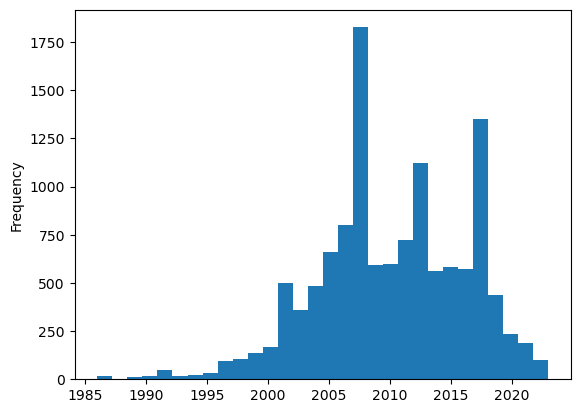

In [162]:
#Patrikinam automobilių metus, kai daugiau nei 1985
ax = df[df['Metai'] > 1985]['Metai'].plot(kind='hist', bins=30)
plt.show()


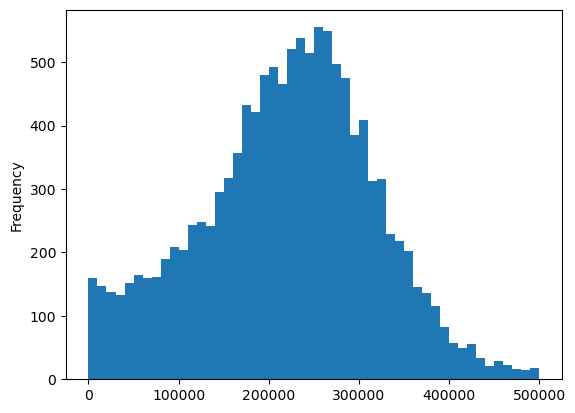

In [163]:
#Patrikinam automobilių ridą, kai ji mažesnė nei 500000
ax = df[df['Rida'] <= 500000]['Rida'].plot(kind='hist', bins=50)
plt.show()

<AxesSubplot:>

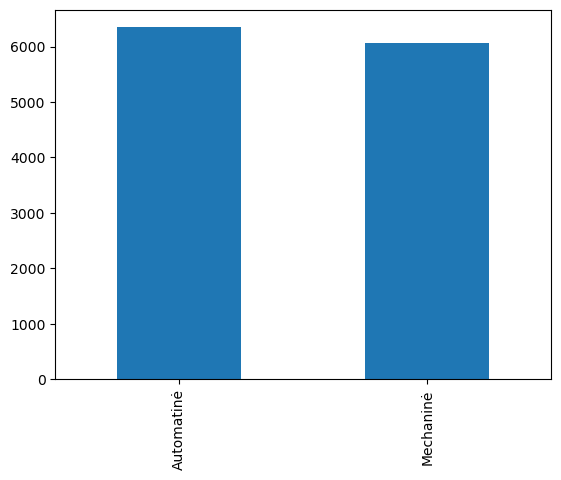

In [164]:
#Patrikinam automobilių pavarų dėžes
df['Pavarų dėžė'].value_counts(dropna=False).plot(kind='bar')

In [165]:
#Užpildom NaN reikšmes
df['Pavarų dėžė'] = df['Pavarų dėžė'].fillna(df['Pavarų dėžė'].mode().iloc[0])

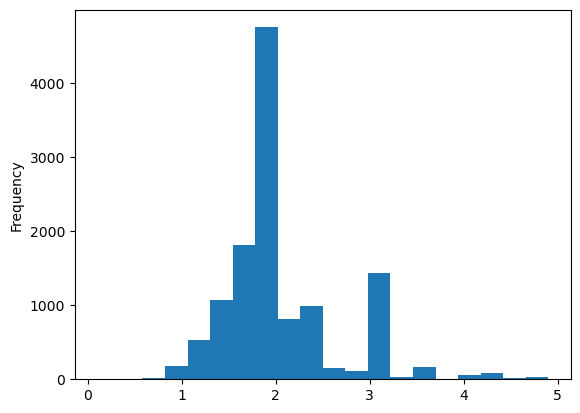

In [166]:
#Patrikinam automobilių darbinį tūrį
ax = df[df['Darbinis tūris'] < 5]['Darbinis tūris'].plot(kind='hist', bins=20)
plt.show()

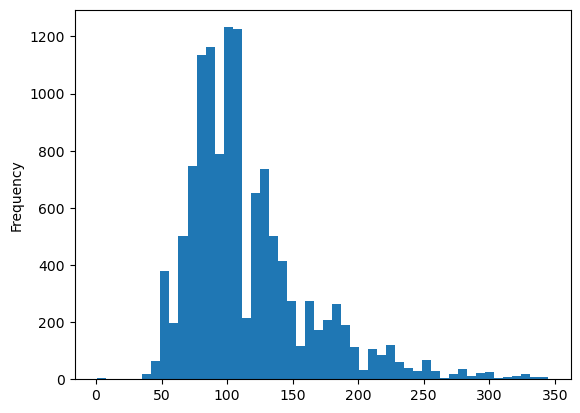

In [167]:
#Patrikinam automobilių galią
ax = df[df['Galia'] <= 350]['Galia'].plot(kind='hist', bins=50)
plt.show()

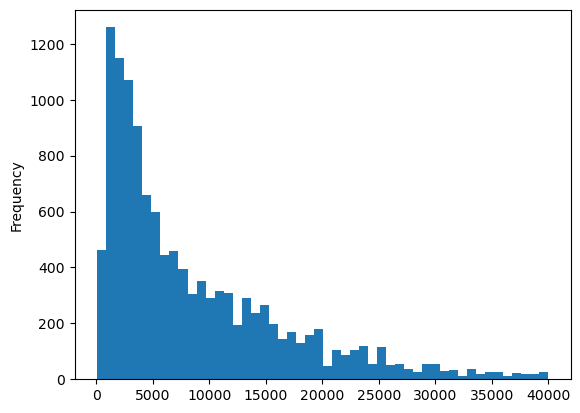

In [168]:
#Patrikinam automobilių kainą, kai ji mežesnė, nei 40000
ax = df[df['Kaina'] <= 40000]['Kaina'].plot(kind='hist', bins=50)
plt.show()

In [169]:
pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))
df['Kaina'].describe()


count     12405.00
mean      10535.30
std       90419.22
min         100.00
25%        2599.00
50%        5900.00
75%       13100.00
max     9999999.00
Name: Kaina, dtype: float64

In [170]:
#Ištrinam išskirtis
df = df[(df['Kaina'] >= 100) & (df['Kaina'] <= 150000)]

In [171]:
#Ištrinam išskirtis naudojant z scores
z_scores = (df['Kaina'] - df['Kaina'].mean()) / df['Kaina'].std()
threshold = 3
df = df[(z_scores <= threshold) & (z_scores >= -threshold)]

In [172]:
#Ištrinam išskirtis naudojant z scores
z_scores = (df['Metai'] - df['Metai'].mean()) / df['Metai'].std()
threshold = 3
df = df[(z_scores <= threshold) & (z_scores >= -threshold)]

In [173]:
#Ištrinam išskirtis naudojant z scores
z_scores = (df['Rida'] - df['Rida'].mean()) / df['Rida'].std()
threshold = 3
df = df[(z_scores <= threshold) & (z_scores >= -threshold)]

In [174]:
#Ištrinam išskirtis naudojant z scores
z_scores = (df['Darbinis tūris'] - df['Darbinis tūris'].mean()) / df['Darbinis tūris'].std()
threshold = 3
df = df[(z_scores <= threshold) & (z_scores >= -threshold)]

In [175]:
#Ištrinam išskirtis naudojant z scores
z_scores = (df['Galia'] - df['Galia'].mean()) / df['Galia'].std()
threshold = 3
df = df[(z_scores <= threshold) & (z_scores >= -threshold)]

_____________________________________________________________________

# Mašininio mokymosi modelių taikymas

## Kintamųjų pasirinkimas

<AxesSubplot:>

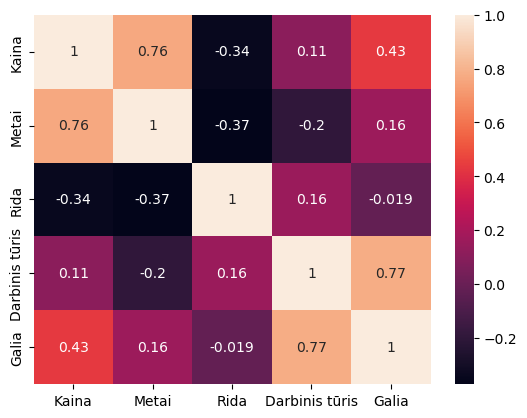

In [176]:
# Naudodami heatmap patikriname koreliacijas tarp kintamųjų
import seaborn as sns
sns.heatmap(df.corr(), annot=True)

Kainos ir metai bei kainos ir galia turi stipresnį ryšį, o kainos ir rida bei kainos ir darbinis tūris turi šiek tiek silpnesnį ryšį.

In [177]:
#Naudojamų bibliotekų įkėlimas
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score

In [178]:
df.head(3)

,Kaina,Markė,Modelis,Metai,Kuro tipas,Kėbulo tipas,Pavarų dėžė,Rida,Darbinis tūris,Galia
0,8500.00,Hyundai,H-1,2011.00,Dyzelinas,Keleivinis mikroautobusas,Mechaninė,267000.00,2.50,125.00
2,2550.00,Skoda,Fabia,2008.00,Dyzelinas,Hečbekas,Mechaninė,234000.00,1.40,59.00
3,2950.00,Subaru,OUTBACK,2005.00,Benzinas/Dujos,Universalas,Automatinė,281356.00,2.50,121.00


In [179]:
# Mašininiam mokymuisi naudojami 11844 įrašai
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11844 entries, 0 to 34124
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Kaina           11844 non-null  float64
 1   Markė           11844 non-null  object 
 2   Modelis         11843 non-null  object 
 3   Metai           11844 non-null  float64
 4   Kuro tipas      11844 non-null  object 
 5   Kėbulo tipas    11844 non-null  object 
 6   Pavarų dėžė     11844 non-null  object 
 7   Rida            11844 non-null  float64
 8   Darbinis tūris  11844 non-null  float64
 9   Galia           11844 non-null  float64
dtypes: float64(5), object(5)
memory usage: 1017.8+ KB


In [180]:
#Geriausiaias rezultatas gautas naudojant visus skaitinius ir kategornius kintamuosius:

#Apibrėžiami skaitiniai požymiai
num_features = ['Metai','Galia','Rida','Darbinis tūris']
#Apibrėžiami kategoriniai požymiai
cat_features = ['Modelis','Markė', 'Kuro tipas','Kėbulo tipas','Pavarų dėžė']

_________________________________________________

## Modelių pasirinkimas ir taikymas

In [181]:
# Konvertuojame kategorinius kintamuosius į "dummy" kintamuosius 
df_with_dummy_cats = pd.get_dummies(df, columns=['Modelis','Markė','Kuro tipas', 'Kėbulo tipas', 'Pavarų dėžė'])

# Dabar mūsų požymiai yra 'Metai','Galia','Rida','Darbinis tūris' ir visi "dummy" stulpeliai iš kategorių kintamųjų
features = num_features + [col for col in df_with_dummy_cats.columns if 'Markė' in col or 'Kuro tipas' in col or 'Kėbulo tipas' in col or 'Pavarų dėžė' in col]

# X pažymimi požymiai, o y - prognozuojama kaina
X = df_with_dummy_cats[features]
y = df_with_dummy_cats['Kaina']

# Daliname duomenis į treniravimosi ir testavimo rinkinius santykiu 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [182]:
# Treniruojami trys modeliai labiausiai tinkantys šio tipo uždaviniui
# Linear Regression modelio taikymas
lr = LinearRegression()
lr.fit(X_train, y_train)

# Decision Tree su cross validation modelio taikymas
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
scores = cross_val_score(dt, X_train, y_train, scoring='neg_root_mean_squared_error', cv=5)
np.mean(-scores)

# Random Forest modelio taikymas
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [183]:
# Modelių testavimas
lr_pred = lr.predict(X_test)
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)

print("Gauti rezultatai konvertavus kategorius kintamuosius į 'dummy': ")
print(f'Linear Regression RMSE: {mean_squared_error(y_test, lr_pred, squared=False)}')
print(f'Decision Tree RMSE: {mean_squared_error(y_test, dt_pred, squared=False)}')
print(f'Random Forest RMSE: {mean_squared_error(y_test, rf_pred, squared=False)}')

Gauti rezultatai konvertavus kategorius kintamuosius į 'dummy': 
Linear Regression RMSE: 3889.8409538679844
Decision Tree RMSE: 3248.149260129949
Random Forest RMSE: 2315.82062586547


In [184]:
# Naudojame orginalų duomenų rinkinį kitų modelių taikymui
df.head(3)

,Kaina,Markė,Modelis,Metai,Kuro tipas,Kėbulo tipas,Pavarų dėžė,Rida,Darbinis tūris,Galia
0,8500.00,Hyundai,H-1,2011.00,Dyzelinas,Keleivinis mikroautobusas,Mechaninė,267000.00,2.50,125.00
2,2550.00,Skoda,Fabia,2008.00,Dyzelinas,Hečbekas,Mechaninė,234000.00,1.40,59.00
3,2950.00,Subaru,OUTBACK,2005.00,Benzinas/Dujos,Universalas,Automatinė,281356.00,2.50,121.00


In [185]:
# Kategorinių kintamųjų transformavimas naudojant OneHotEncoder
one_hot = OneHotEncoder()
# Skaitinių kintamųjų standartizavimas
scaler = StandardScaler()

transformer = ColumnTransformer([("one_hot", one_hot, cat_features), ("standard_scaler", scaler, num_features)], 
                                remainder="passthrough")

# Transformuojami kintamieji
X_transformed = transformer.fit_transform(df.drop('Kaina', axis=1))
y = df['Kaina']

In [186]:
# Daliname duomenis į treniravimosi ir testavimo rinkinius santykiu 80/20
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

In [187]:
# Linear Regression modelio taikymas
lr = LinearRegression()
lr.fit(X_train, y_train)

# Decision Tree su cross validation modelio taikymas
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
scores = cross_val_score(dt, X_train, y_train, scoring='neg_root_mean_squared_error', cv=5)
np.mean(-scores)

# Random Forest modelio taikymas
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [188]:
# Modelių testavimas
lr_pred = lr.predict(X_test)
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)

print("Gauti rezultatai konvertavus kategorius kintamuosius su 'OneHotEncoder', o skaitinius standartizavus su 'StandardScaler': ")
print(f'Linear Regression RMSE: {mean_squared_error(y_test, lr_pred, squared=False)}')
print(f'Decision Tree RMSE: {mean_squared_error(y_test, dt_pred, squared=False)}')
print(f'Random Forest RMSE: {mean_squared_error(y_test, rf_pred, squared=False)}')

Gauti rezultatai konvertavus kategorius kintamuosius su 'OneHotEncoder', o skaitinius standartizavus su 'StandardScaler': 
Linear Regression RMSE: 3481.9534573801984
Decision Tree RMSE: 3022.4708497467095
Random Forest RMSE: 2286.4412753444085


Konvertavus kategorius kintamuosius su OneHotEncoder, o skaitinius standartizavus gauti geresni visų modelių rezultatai

Kadangi buvo gauti geriausi rezultatai su Random Forest geriausių hiperparametrų ieškoma tik šiam modeliui

In [189]:
# Automatiškai ieškome geriausių hiperparametrų Random Forest modeliui su RandomizedSearchCV

# Nustatome parametrų reikšmių intervalus
param_distribs = {
        'n_estimators': range(2, 150),
        'max_features': range(2, 500), 
        'max_depth': range(2, 100)
    }

# Naudojame Random Forest modelį su RandomizedSearchCV
forest_reg = RandomForestRegressor(n_jobs=3, random_state=42)
forest_rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                       n_iter=5, cv=3, scoring='neg_root_mean_squared_error', 
                                       random_state=42)

# Treniruojame modelį
forest_rnd_search.fit(X_train, y_train)

# Gauname geriausias parametrų reikšmes
print("Geriausi parametrai su Randomized Search CV: ", forest_rnd_search.best_params_)

# Atlikiame prognozes
rf_pred = forest_rnd_search.predict(X_test)

# Įvertiname modelio efektyvumą
print(f'Random Forest RMSE: {mean_squared_error(y_test, rf_pred, squared=False)}')

Geriausi parametrai su Randomized Search CV:  {'n_estimators': 101, 'max_features': 234, 'max_depth': 96}
Random Forest RMSE: 2225.0172320974434


In [190]:
# Suskaičiuojamas R-squared score
r2 = r2_score(y_test, rf_pred)
print(f'R-squared: {r2}')

R-squared: 0.9195226207445448


Išvada: aukštas R-squared score rodiklis paaškina apie 91,9% duomenų variaciją

In [191]:
# Automatiškai ieškome geriausių hiperparametrų Random Forest modeliui su GridSearchCV

# Nustatome parametrų reikšmių intervalus
param_distribs = {
        'n_estimators': [30, 100, 200],
        'max_features': [30, 200, 300],
        'max_depth': [30, 40, 50]
    }

# Naudojame Random Forest modelį su GridSearchCV
forest_reg = RandomForestRegressor(n_jobs=3, random_state=42)
forest_grd_search = GridSearchCV(forest_reg, param_distribs,
                                 cv=3, scoring='neg_root_mean_squared_error')

# Treniruojame modelį
forest_grd_search.fit(X_train, y_train)

# Gauname geriausias parametrų reikšmes
print("Geriausios parametrų reikšmės su Grid Search CV: ", forest_grd_search.best_params_)

# Atlikiame prognozes
rf_pred = forest_grd_search.predict(X_test)

# Įvertiname modelio efektyvumą
print(f'Random Forest RMSE: {mean_squared_error(y_test, rf_pred, squared=False)}')

Geriausios parametrų reikšmės su Grid Search CV:  {'max_depth': 40, 'max_features': 300, 'n_estimators': 200}
Random Forest RMSE: 2238.2316616821927


In [192]:
# Suskaičiuojamas R-squared score
r2 = r2_score(y_test, rf_pred)
print(f'R-squared: {r2}')

R-squared: 0.918563868056424


Išvada: aukštas R-squared score rodiklis paaškina apie 91,8% duomenų variaciją

Galutinė išvada: Geriausias modelio efektyvumas pasiektas su 'Random Forest Regressor' naudojant 'Randomized Search CV'